# A2 : Feature Selection Methods Comparison
This notebook experiments with different feature selection methods on the Breast Cancer Dataset.

In [55]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [38]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

print(data.target_names)

['malignant' 'benign']


In [39]:
# Create a DataFrame to display dataset summary
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

display(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## Dataset Information

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Dataset Summary Statistics

In [41]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Features Correlation Analysis

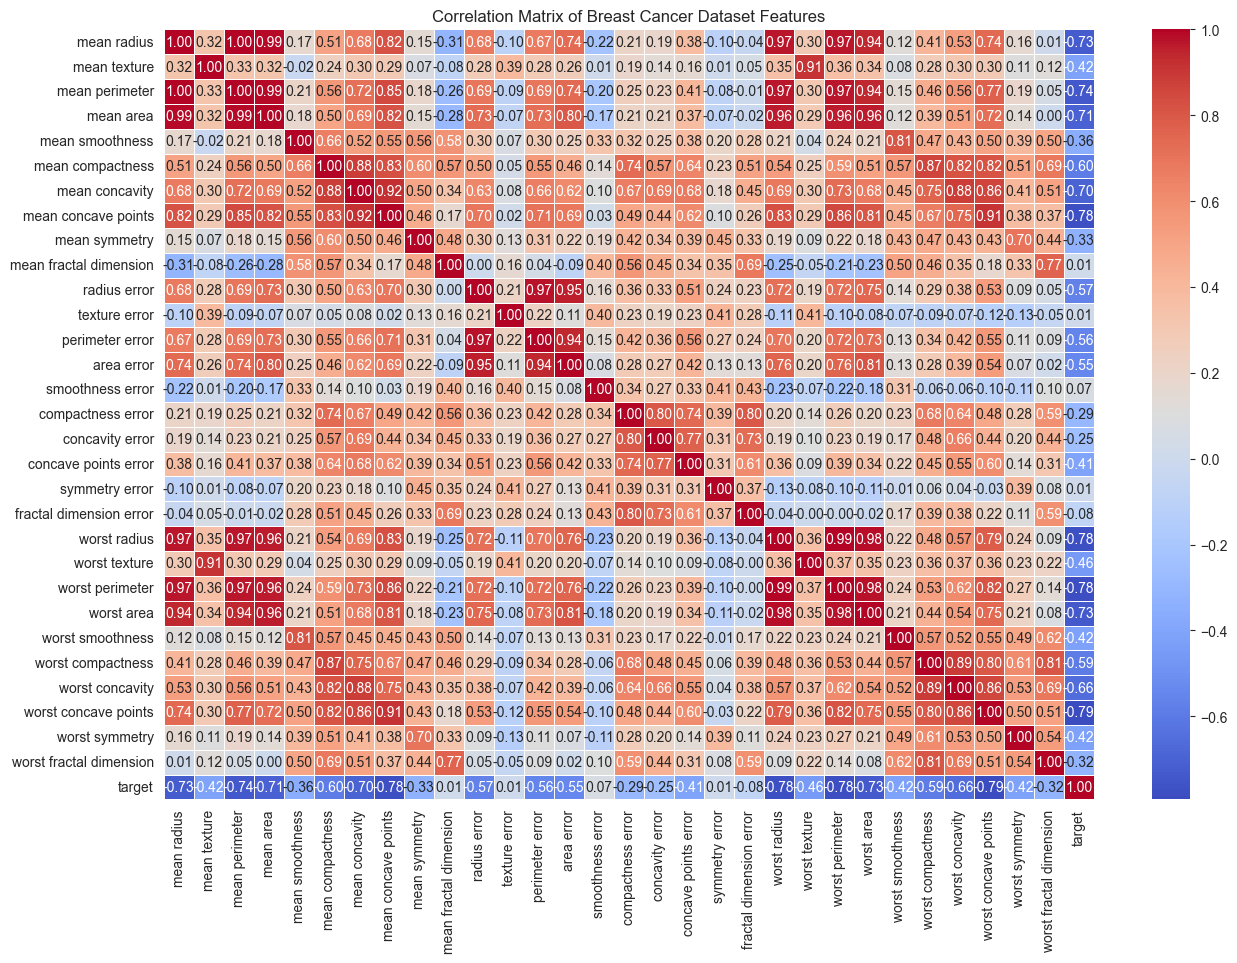

In [42]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f',linewidths=0.5)
plt.title("Correlation Matrix of Breast Cancer Dataset Features")
plt.show()

In [43]:
# Extract correlations with the target variable, excluding the target itself
target_corr = correlation_matrix['target'].drop(labels=['target'])

# Sort features by their absolute correlation with the target variable in descending order
sorted_target_corr = target_corr.abs().sort_values(ascending=False)

print("Features sorted by their absolute correlation with the target variable:")
print(sorted_target_corr)

# Identify unique pairs of features with high inter-correlation (e.g., correlation coefficient > 0.9)
threshold = 0.9
high_corr_pairs = set()  # Using a set to ensure unique pairs

# Iterate over the correlation matrix to find pairs of features with high correlation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.add((colname_j, colname_i, correlation_matrix.iloc[i, j]))

print("\nUnique pairs of features with correlation coefficient greater than 0.9:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation coefficient = {pair[2]:.2f}")

Features sorted by their absolute correlation with the target variable:
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0

/var/folders/ck/52zzd2z55nb5xvm8lgy7mslw0000gn/T/ipykernel_27284/404949621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sorted_target_corr.index, x=sorted_target_corr.values, hue=None, palette="viridis")


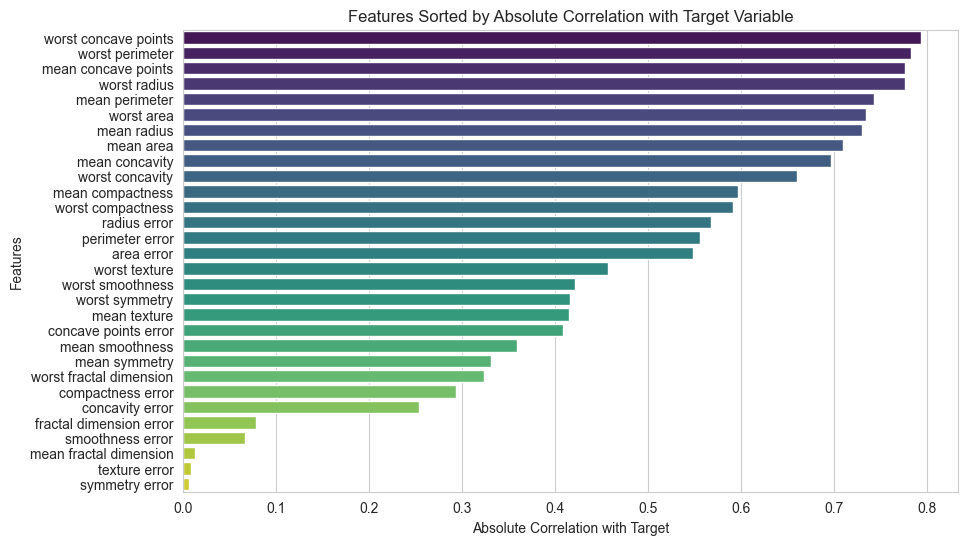

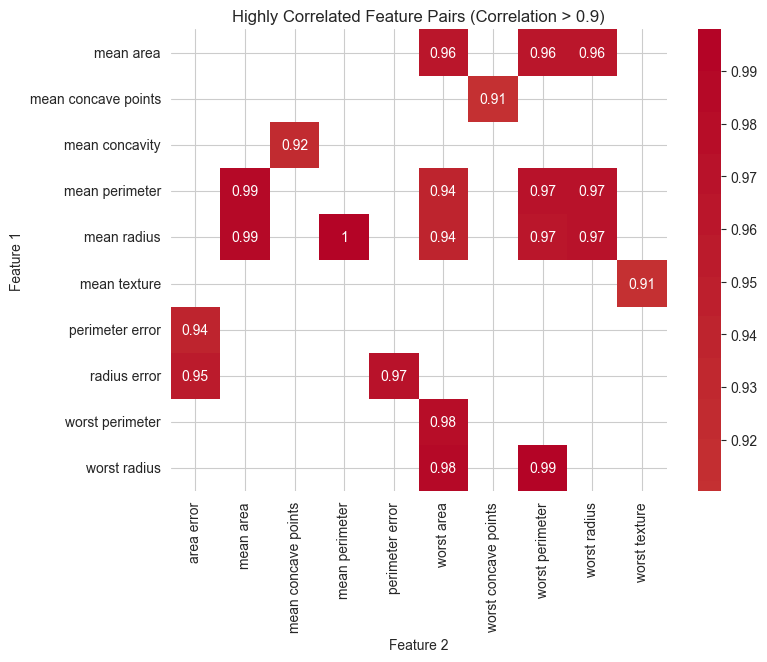

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of features sorted by absolute correlation with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(y=sorted_target_corr.index, x=sorted_target_corr.values, hue=None, palette="viridis")
plt.title("Features Sorted by Absolute Correlation with Target Variable")
plt.xlabel("Absolute Correlation with Target")
plt.ylabel("Features")
plt.legend([], [], frameon=False)  # Remove the legend if it appears
plt.show()


# Creating a DataFrame to show highly correlated feature pairs for easier visualization
high_corr_df = pd.DataFrame(list(high_corr_pairs), columns=["Feature 1", "Feature 2", "Correlation"])

# Plotting the highly correlated feature pairs
plt.figure(figsize=(8, 6))
sns.heatmap(high_corr_df.pivot(index="Feature 1", columns="Feature 2", values="Correlation").abs(), 
            annot=True, cmap="coolwarm", center=0)
plt.title("Highly Correlated Feature Pairs (Correlation > 0.9)")
plt.show()



## Feature Selection And Training Classifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


In [46]:
X_train_df = pd.DataFrame(X_train, columns=df.columns[:X_train.shape[1]])

X_train_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.093847,19.341533,91.698945,650.784171,0.095789,0.103143,0.088446,0.048049,0.180493,0.062710,...,16.266560,25.816307,107.220678,879.696734,0.132259,0.257170,0.278710,0.114485,0.292938,0.084229
std,3.489558,4.500457,24.063881,340.295183,0.013349,0.053362,0.081509,0.038697,0.028055,0.007314,...,4.849813,6.328322,33.774071,565.421849,0.022681,0.164706,0.221662,0.067716,0.065137,0.019050
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.055210
25%,11.662500,15.990000,74.902500,417.100000,0.085902,0.062760,0.027920,0.019675,0.161625,0.057480,...,13.062500,21.322500,84.020000,518.700000,0.115300,0.141650,0.107300,0.063532,0.250050,0.071155
50%,13.275000,18.825000,86.040000,544.050000,0.095005,0.088165,0.058635,0.032300,0.178050,0.061280,...,14.915000,25.490000,97.620000,682.000000,0.131300,0.216400,0.227300,0.097000,0.283100,0.079870
75%,15.772500,21.832500,103.675000,777.400000,0.104750,0.129775,0.132375,0.073910,0.195300,0.066110,...,18.805000,29.452500,126.075000,1092.250000,0.146375,0.341175,0.385900,0.166950,0.320600,0.092172
max,25.730000,39.280000,174.200000,2010.000000,0.142500,0.345400,0.426400,0.191300,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Baseline With All Features

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)
print("Classification Report on Training Set:")
print(classification_report(y_train, y_train_pred))

# Predict on the test set and print classification report to compare
y_test_pred = model.predict(X_test_scaled)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       148
           1       0.96      1.00      0.98       250

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        64
           1       0.93      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



### Recursive Feature Elimination (RFE)

In [49]:
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, recall_score, accuracy_score

# Recursive Feature Elimination with recall optimization
def optimize_features_by_rfe(X_train, y_train, X_test, y_test, model):
    total_features = X_train.shape[1]
    num_features_to_test = np.arange(total_features - 1, 0, -1)
    
    best_recall = 0
    best_model = None
    best_num_features = 0
    accuracy_scores = []
    recall_scores_class_0 = []

    for i in num_features_to_test:
        rfe = RFE(estimator=model, n_features_to_select=i)
        rfe.fit(X_train, y_train)

        y_pred = rfe.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
        
        accuracy_scores.append(accuracy)
        recall_scores_class_0.append(recall_class_0)

        # Update best model based on recall and, if tied, the number of features
        if (recall_class_0 > best_recall) or (recall_class_0 == best_recall and i < best_num_features):
            best_recall = recall_class_0
            best_model = rfe
            best_num_features = i

    return best_model, best_recall, best_num_features, accuracy_scores, recall_scores_class_0, num_features_to_test

# Plot accuracy and recall for feature selection process
def plot_metrics(num_features_to_test, accuracy_scores, recall_scores_class_0):
    plt.figure(figsize=(10, 8))
    plt.plot(num_features_to_test, accuracy_scores, marker='o', label='Accuracy')
    plt.plot(num_features_to_test, recall_scores_class_0, marker='x', label='Recall (Class 0 - Malignant)')
    plt.xlabel("Number of Selected Features")
    plt.ylabel("Score")
    plt.title("Model Performance as Features are Selected (RFE)")
    plt.legend()
    plt.grid(True)
    plt.show()

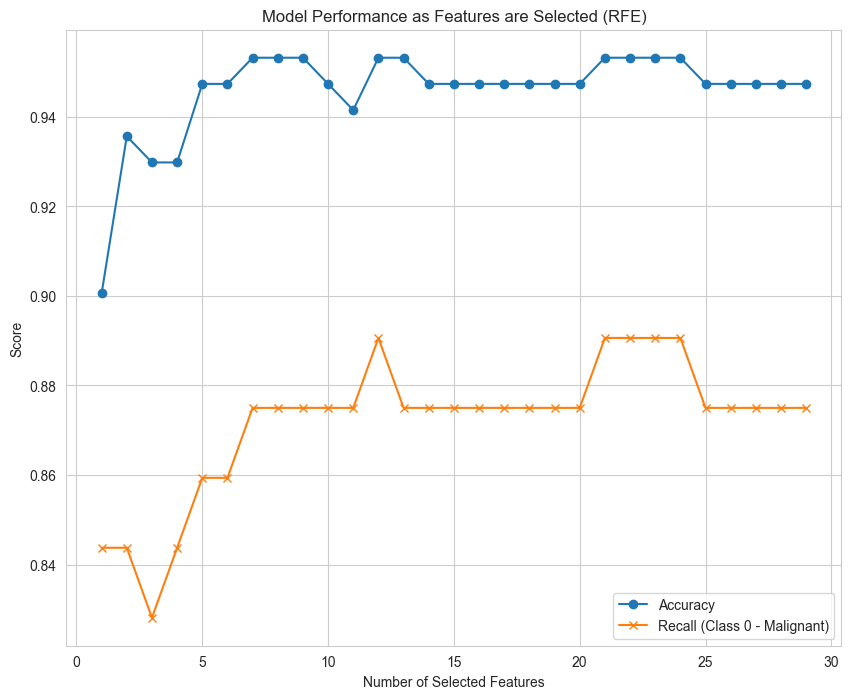


Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       148
           1       0.97      1.00      0.98       250

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Best Recall for Malignant Class (Class 0): 0.89 with 12 features
Final Selected Features:
['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'wor

In [50]:
from sklearn.linear_model import LogisticRegression


# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

best_model, best_recall, best_num_features, accuracy_scores, recall_scores_class_0, num_features_to_test = optimize_features_by_rfe(
        X_train_scaled, y_train, X_test_scaled, y_test, model)

# Plot accuracy and recall scores for different feature counts
plot_metrics(num_features_to_test, accuracy_scores, recall_scores_class_0)

# Evaluate the best model
y_train_pred = best_model.predict(X_train_scaled)
y_pred_best = best_model.predict(X_test_scaled)

print("\nClassification Report for Training Set:")
print(classification_report(y_train, y_train_pred))
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred_best))

print(f"Best Recall for Malignant Class (Class 0): {best_recall:.2f} with {best_num_features} features")

# Display final selected features for the best model
selected_features_rfe = df.columns[:-1][best_model.support_]
print("Final Selected Features:")
print(selected_features_rfe.tolist())

### SelectFromModel

In [51]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)


selector = SelectFromModel(model, prefit=True, threshold="mean")

# Transform the training and test sets with selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature names
selected_features = df.columns[:-1][selector.get_support()]
print(f"Selected {len(selected_features)} features by SelectFromModel:{selected_features.tolist()}")

# Train a new LogisticRegression using the selected features
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_selected, y_train)

y_train_pred =  lr_model.predict(X_train_selected)
print("Classification Report on Training Set:")
print(classification_report(y_train, y_train_pred))

# Predict on the test set and print classification report to compare
y_test_pred = lr_model.predict(X_test_selected)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Selected 4 features by SelectFromModel:['mean concave points', 'worst radius', 'worst texture', 'worst concave points']
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       148
           1       0.95      0.99      0.97       250

    accuracy                           0.96       398
   macro avg       0.97      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        64
           1       0.93      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



### Genetic Algorithm

In [52]:
def initialize_population(n_population, n_features, feature_selection_ratio=0.7):
    # Initialize the population with binary feature selection
    population = []
    for _ in range(n_population):
        # Create an individual with selected features according to the ratio
        individual = np.random.choice([0, 1], size=n_features, p=[1 - feature_selection_ratio, feature_selection_ratio])
        population.append(individual)
    
    return np.array(population)

def calc_fitness(population, X_train, y_train, X_val, y_val, model, delta=0.9, gamma=0.01, correlation_threshold=0.9):
    fitness_scores = []    

    # Calculate correlation matrix once
    corr_matrix = np.corrcoef(X, rowvar=False)
    np.fill_diagonal(corr_matrix, 0)

    for individual in population:
        selected_features = individual == 1
        X_train_selected = X_train[:, selected_features]
        X_val_selected = X_val[:, selected_features]

        # Skip individuals with no features selected
        if X_train_selected.shape[1] == 0:
            fitness_scores.append(0)
            continue

        # Fit the model on the selected features of the training set
        model.fit(X_train_selected, y_train)

        # Predict and calculate recall for class 0 on the validation set
        y_pred = model.predict(X_val_selected)
        recall_class_0 = recall_score(y_val, y_pred, pos_label=0)

        # Feature Sparsity Penalty (Encourage fewer features)
        feature_count_penalty = np.sum(selected_features) / X.shape[1]

         # Correlation Penalty (Encourage diverse feature selection)
        selected_corr_matrix = corr_matrix[selected_features][:, selected_features]
        high_corr_values = selected_corr_matrix[selected_corr_matrix > correlation_threshold]

        if high_corr_values.size > 0:
            avg_correlation = np.mean(np.abs(high_corr_values))
        else:
            avg_correlation = 0  # Set default value if no correlations exceed threshold


        # Fitness Calculation: weighted recall for class 0 minus feature sparsity penalty
        fitness = (delta * recall_class_0) - (gamma * feature_count_penalty) - (gamma * avg_correlation)
        fitness_scores.append(fitness)

    return np.array(fitness_scores)

def tournament(population, fitness_scores, tournament_size=3):
    selected_indices = np.random.choice(len(population), tournament_size, replace=False)
    best_index = selected_indices[np.argmax(fitness_scores[selected_indices])]
    return population[best_index], best_index

def tournament_selection(population, fitness_scores, tournament_size=3):
    parent1, parent1_index = tournament(population, fitness_scores, tournament_size)
    
    parent2, parent2_index = tournament(population, fitness_scores, tournament_size)
    #Ensure same parent is not selected again for crossover
    while parent2_index == parent1_index:
        parent2, parent2_index = tournament(population, fitness_scores, tournament_size)
    
    return np.array([parent1, parent2])

def crossover(parent1, parent2):
    # Generate a random crossover point (between 1 and len(parent) - 1)
    crossover_point = np.random.randint(1, len(parent1))
    # Create offspring by combining parts of both parents at the crossover point
    offspring = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    
    return offspring

def mutation(chromosome, mutation_rate, n_features):
    mutated_chromosome = chromosome.copy()
    mutation_range = int(mutation_rate * n_features)
    mutation_indices = np.random.choice(n_features, mutation_range, replace=False)
    mutated_chromosome[mutation_indices] = 1 - mutated_chromosome[mutation_indices]
    return mutated_chromosome

def generation(population, n_features,fitness_scores, crossover_rate=0.8, tournament_size=3,mutation_rate=0.01):
    
    num_crossover_individuals = int(len(population) * crossover_rate)
    num_elites = len(population) - num_crossover_individuals
    elite_indices = np.argsort(fitness_scores)[-num_elites:]
    elites = population[elite_indices]
    
    new_population = []
    
    while len(new_population) < num_crossover_individuals:
        parent1, parent2 = tournament_selection(population, fitness_scores, tournament_size)
        offspring = crossover(parent1, parent2)
        
        offspring = mutation(offspring, mutation_rate,n_features)
        
        new_population.append(offspring)
    
    new_population = np.array(new_population)
    new_population = np.concatenate((new_population, elites), axis=0)
    
    return new_population

def genetic_algorithm(X_train, y_train, X_val, y_val, model, n_generations=50, n_population=60,
                      feature_selection_ratio=0.4, delta=0.7, gamma=0.3, correlation_threshold=0.8,
                      crossover_rate=0.8, mutation_rate=0.01, tournament_size=3):
    n_features = X_train.shape[1]
    
    # Step 1: Initialize population
    population = initialize_population(n_population, n_features, feature_selection_ratio)
    
    # Track the best fitness score and corresponding individual
    best_fitness = -np.inf
    best_individual = None
    best_features = None
    
    for n_gen in range(n_generations):
        # Step 2: Calculate fitness scores for the population
        fitness_scores = calc_fitness(population, X_train, y_train, X_val, y_val, model,
                                             delta=delta, gamma=gamma, correlation_threshold=correlation_threshold)
        
        # Step 3: Record the best individual in the current generation
        max_fitness_idx = np.argmax(fitness_scores)
        if fitness_scores[max_fitness_idx] > best_fitness:
            best_fitness = fitness_scores[max_fitness_idx]
            best_individual = population[max_fitness_idx]
            best_features = np.where(best_individual == 1)[0]
        
        # Step 4: Generate new population through selection, crossover, and mutation
        population = generation(population, n_features, fitness_scores, crossover_rate=crossover_rate,
                                tournament_size=tournament_size, mutation_rate=mutation_rate)
    return best_individual, best_fitness, best_features


In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Step 1: Split X_train into X_train_ga and X_val_ga
X_train_ga, X_val_ga, y_train_ga, y_val_ga = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Apply MinMaxScaler to all sets
scaler = MinMaxScaler()
X_train_ga_scaled = scaler.fit_transform(X_train_ga)
X_val_ga_scaled = scaler.transform(X_val_ga)
X_test_scaled = scaler.transform(X_test)

# Initialize cumulative feature selection counts
feature_selection_counts_total = np.zeros(X_train_ga_scaled.shape[1])

# Below loop is used just for experimentation purpose and analyse which features are consistently selected.
target_recall = 0.90
achieved_recall = 0
run = 0
while achieved_recall < target_recall:
    run += 1
    # Step 3: Run the Genetic Algorithm for Feature Selection
    best_individual, best_fitness, best_features = genetic_algorithm(
        X_train_ga_scaled, y_train_ga, X_val_ga_scaled, y_val_ga,
        model=LogisticRegression(random_state=42),
        n_generations=30,
        n_population=60,
        feature_selection_ratio=0.7,
        delta=1.0,
        gamma=0.01,
        correlation_threshold=0.9,
        crossover_rate=0.9,
        mutation_rate=0.1,
        tournament_size=3
    )

    # Update cumulative feature selection counts
    feature_selection_counts_total[best_features] += 1

    # Prepare data with selected features using original train and test sets
    X_train_selected = X_train_scaled[:, best_features]
    X_test_selected = X_test_scaled[:, best_features]

    # Train the new logistic regression model
    final_model = LogisticRegression(random_state=42)
    final_model.fit(X_train_selected, y_train)

    # Evaluate on the independent test set
    y_train_pred = final_model.predict(X_train_selected)
    y_test_pred = final_model.predict(X_test_selected)
    achieved_recall = recall_score(y_test, y_test_pred, pos_label=0)
    
    # Check if recall target is achieved and break if it is
    if achieved_recall >= target_recall:
        break

# Display cumulative feature selection counts
feature_names = df.columns[:-1]  # Assuming the last column is the target variable
print(f"\nCumulative Feature Selection Counts for {run} runs for analysis:")
for feature, count in zip(feature_names, feature_selection_counts_total):
    print(f"{feature}: {count}")

# Display selected feature names and their counts
selected_feature_names = feature_names[best_features]
selected_feature_counts = feature_selection_counts_total[best_features]
print(f"\nSelected {len(best_features)} Features in the last GA run:")
print(f"{selected_feature_names.tolist()}")

# Display final classification report
print("\nClassification Report On Training Set:")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Cumulative Feature Selection Counts for 8 runs for analysis:
mean radius: 4.0
mean texture: 0.0
mean perimeter: 0.0
mean area: 1.0
mean smoothness: 2.0
mean compactness: 4.0
mean concavity: 1.0
mean concave points: 0.0
mean symmetry: 2.0
mean fractal dimension: 4.0
radius error: 4.0
texture error: 0.0
perimeter error: 1.0
area error: 0.0
smoothness error: 2.0
compactness error: 2.0
concavity error: 1.0
concave points error: 1.0
symmetry error: 0.0
fractal dimension error: 3.0
worst radius: 2.0
worst texture: 0.0
worst perimeter: 1.0
worst area: 0.0
worst smoothness: 8.0
worst compactness: 1.0
worst concavity: 1.0
worst concave points: 8.0
worst symmetry: 3.0
worst fractal dimension: 1.0

Selected 7 Features in the last GA run:
['mean smoothness', 'mean compactness', 'mean fractal dimension', 'fractal dimension error', 'worst perimeter', 'worst smoothness', 'worst concave points']

Classification Report On Training Set:
              precision    recall  f1-score   support

           